In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [39]:
operations = pd.read_csv("../cointegration_results/operations_20_pairs.csv")
operations['Pair'] = operations['Index'].str[:-2]
print(operations.tail())

      Operação  Semestre  Abertura  Fechamento  Dias  Retorno total Ticker 1  \
2059         2        48      6393        6407    14       0.028971       XL   
2060         1        48      6300        6310    10       0.076906      ABT   
2061         2        48      6333        6336     3       0.030730      ABT   
2062         3        48      6403        6413    10       0.055153      ABT   
2063         1        48      6320        6334    14       0.131276       DE   

     Ticker 2    Return       Index  Retorno total - exp      Pair  
2059      ROP  0.076396    XL-ROP-2             1.029395    XL-ROP  
2060     EBAY  0.103134  ABT-EBAY-1             1.079940  ABT-EBAY  
2061     EBAY  0.164525  ABT-EBAY-2             1.031207  ABT-EBAY  
2062     EBAY  0.226584  ABT-EBAY-3             1.056702  ABT-EBAY  
2063      TSN  0.163602    DE-TSN-1             1.140283    DE-TSN  


In [40]:
#print(f"Converged operations: {sum(operations['Converged'])} | Open operations: {np.shape(operations)[0] - sum(operations['Converged'])}")
print(f"Número de operações: {np.shape(operations)[0]}")
print(f"Positive Returns: {sum(operations['Retorno total'] > 0)} | Negative: {sum(operations['Retorno total'] < 0)}")
print(f"Highest Return: {operations['Retorno total'].max()}")
print(f"Lowest Return: {operations['Retorno total'].min()}")
print(f"Average Return: {operations['Retorno total'].mean()}")
print(f"Average trade lenght: {operations['Dias'].mean()}")

Número de operações: 2064
Positive Returns: 1908 | Negative: 90
Highest Return: 0.7673967100872483
Lowest Return: -0.0929472443572065
Average Return: 0.051412088700015415
Average trade lenght: 11.326065891472869


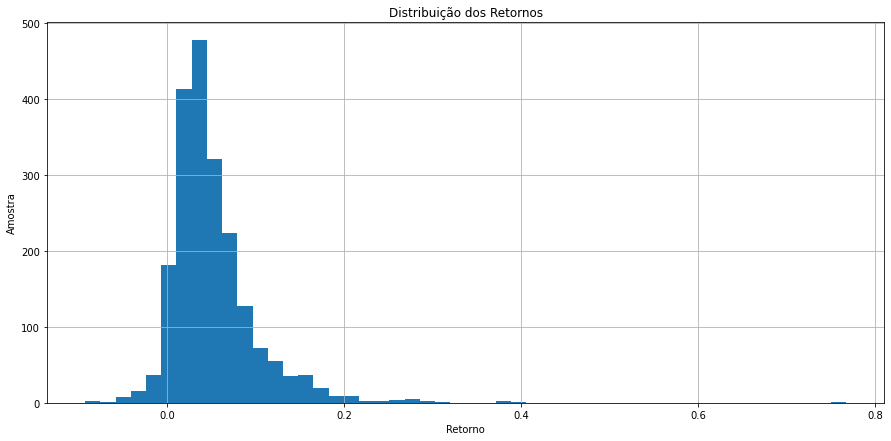

In [41]:
# Return Distribution
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
operations['Retorno total'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Retorno')
ax1.set_ylabel('Amostra')
ax1.set_title('Distribuição dos Retornos')
plt.show()

<AxesSubplot:>

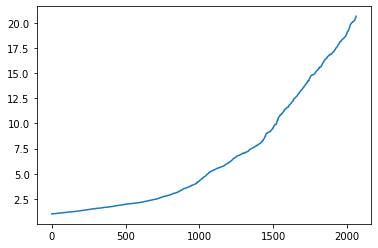

In [42]:
weighted_returns = operations['Retorno total'] / 35
np.cumprod(1+weighted_returns).plot()

In [43]:
# Ações com maior participação
count_s1 = operations.groupby("Ticker 1").count()
count_s2 = operations.groupby("Ticker 2").count()

stock_count = {}

for row in range(0,np.shape(count_s1)[0]):
    #print(f"Stock {count_s1.index[row]} - {count_s1['Semester'][row]}")
    stock_count[count_s1.index[row]] = count_s1['Semestre'][row]

for row in range(0,np.shape(count_s2)[0]):
    if count_s2.index[row] in stock_count:
        stock_count[count_s2.index[row]] += count_s2['Semestre'][row]
    else:
        stock_count[count_s2.index[row]] = count_s2['Semestre'][row]

stock_count_df = pd.DataFrame(stock_count.items()) 
stock_count_df = stock_count_df.sort_values(1)
stock_count_df.to_csv("../cointegration_results/stock_count.csv")

In [44]:
# Retorno por par
operations_by_pair = operations.groupby("Pair").sum("Retorno total")
print(operations_by_pair)
print(f"Número de pares: {np.shape(operations_by_pair)[0]}")
print(f"Retorno médio por par: {round(100*operations_by_pair['Retorno total'].mean(),4)}%")

                   Operação  Semestre  Abertura  Fechamento  Dias  \
Pair                                                                
0111145D-1280712D         3        48      6703        6739    36   
0111145D-AAMRQ            3        40      5653        5695    42   
0111145D-TMO              3        48      6654        6680    26   
0202445Q-BCO             15         5      2136        2177    41   
0544749D-TOY              3        42      5860        5895    35   
...                     ...       ...       ...         ...   ...   
XRX-MAT                   1        17      2447        2466    19   
XRX-MCK                   1        30      4047        4070    23   
XRX-WOR                   3         4      1072        1126    54   
ZION-GME                  1        39      5193        5217    24   
ZION-ISRG                 6       138     18323       18344    21   

                   Retorno total    Return  Retorno total - exp  
Pair                                

In [46]:
# Ações com maior participação
stock_count = {}

for pair in operations_by_pair.index:
    stocks = pair.split("-")
    for stock in stocks:   
        if stock in stock_count:
            stock_count[stock] += 1
        else:
            stock_count[stock] = 1
stock_count_df = pd.DataFrame(stock_count.items()) 
stock_count_df = stock_count_df.sort_values(1)
stock_count_df.to_csv("../cointegration_results/stock_count_20_pairs.csv")